## Mall Customer Segmentation

In [1]:
from sklearn.preprocessing import StandardScaler

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

import os
import warnings

warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set(style="darkgrid")

from sklearn.cluster import KMeans 
from sklearn.preprocessing import StandardScaler

from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_samples, silhouette_score

%matplotlib inline

In [153]:
df=pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### Data Exploration

In [5]:
df.info()  #There are 200 data and 5 variable, gender variable is categorical but others int. There is no null value

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [154]:
df = df.drop('CustomerID', axis=1)
df.rename(columns={'Annual Income (k$)':'Annual-Income', 'Spending Score (1-100)':'Spending-Score'}, inplace=True)
df.head(5)

,Gender,Age,Annual-Income,Spending-Score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [54]:
df.describe()

,Age,Income,Score
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [12]:
df.isna().sum()

Gender    0
Age       0
Income    0
Score     0
dtype: int64

In [10]:
print("Mean of Annual Income of female:",df['Income'].loc[df['Gender'] == 'Female'].mean())
print("Mean of Annual Income of male:",df['Income'].loc[df['Gender'] == 'Male'].mean())

Mean of Annual Income of female: 59.25
Mean of Annual Income of male: 62.22727272727273


### Data Visualzation

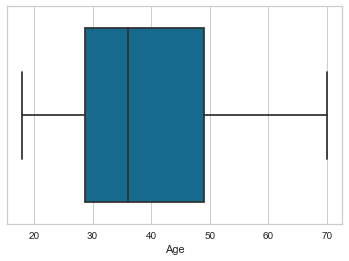

In [34]:
sns.boxplot(df['Age'])
plt.show()

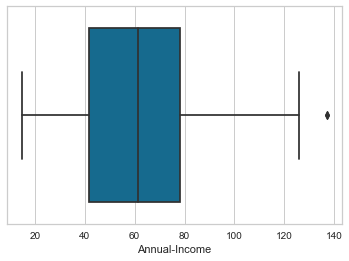

In [24]:
sns.boxplot(df['Annual-Income'])
plt.show()

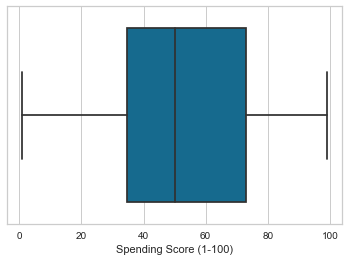

In [33]:
sns.boxplot(df['Spending Score (1-100)'])
plt.show()

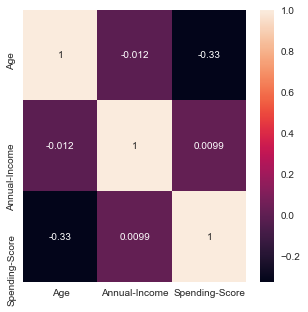

In [36]:
corr=df.corr() 
plt.figure(figsize=(5,5))
sns.heatmap(corr,annot=True) 

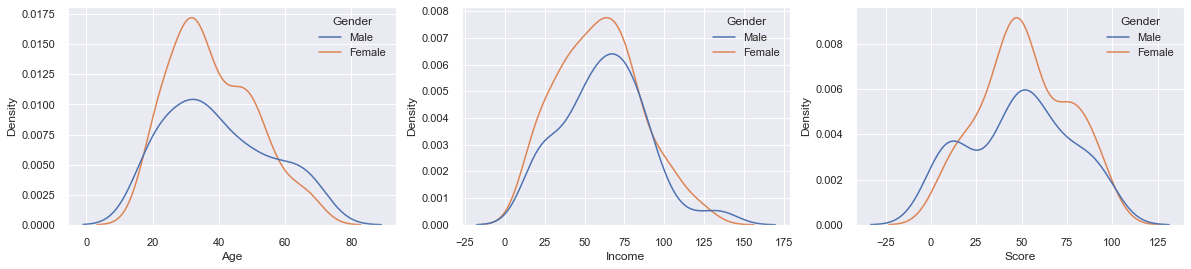

In [84]:
plt.figure(figsize=(20,4))
plt.subplot(1,3,1)
sns.kdeplot(data=df,x="Age",hue='Gender')

plt.subplot(1,3,2)
sns.kdeplot(data=df,x="Income",hue='Gender')

plt.subplot(1,3,3)
sns.kdeplot(data=df,x="Score",hue='Gender')

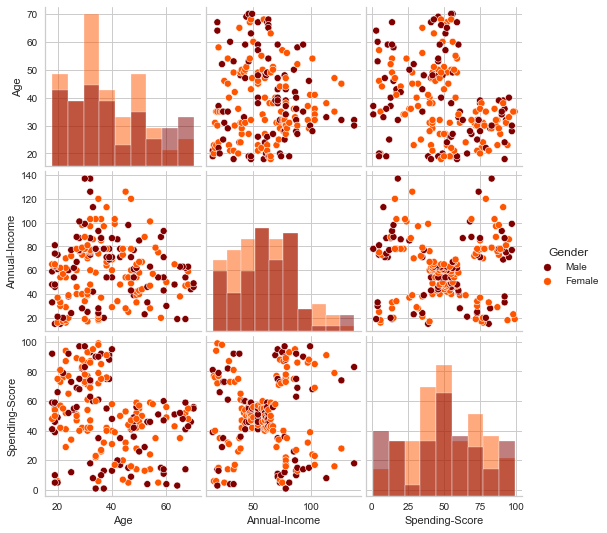

In [37]:
sns.pairplot(df,hue="Gender",palette="gist_heat",diag_kind='hist',dropna=True) 

### Clustering with K-Means

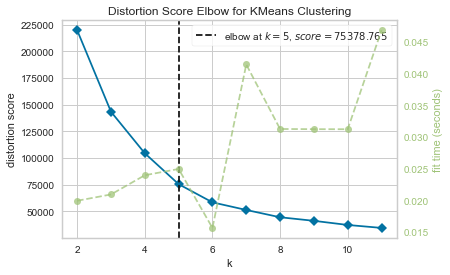

In [155]:
from yellowbrick.cluster import KElbowVisualizer
kmeans = KMeans()
df2 = df[['Age','Annual-Income', 'Spending-Score']].values
visulation = KElbowVisualizer(kmeans, k = (2,12)) 
visulation.fit(df2)
visulation.poof()

In [ ]:
Above visualization shows that 5 clusters would be optimal in order to segment our customer .

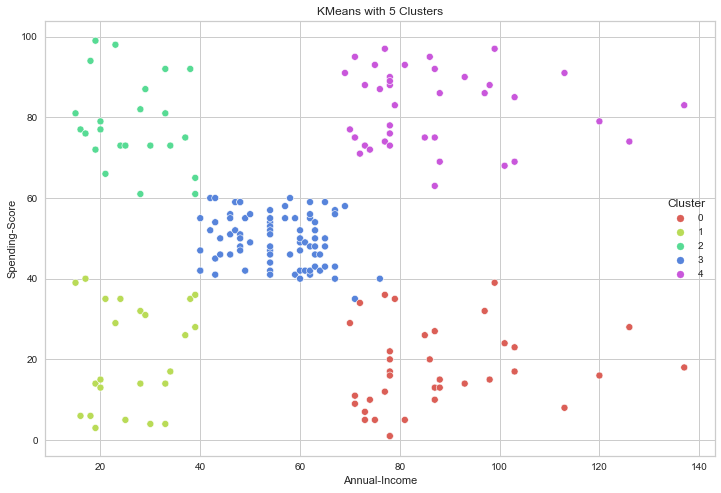

In [156]:

km5 = KMeans(n_clusters=5).fit(df2)

df['Cluster'] = km5.labels_
plt.figure(figsize=(12, 8))
sns.scatterplot(df['Annual-Income'], df['Spending-Score'], hue=df['Cluster'], 
                palette=sns.color_palette('hls', 5))
plt.title('KMeans with 5 Clusters')
plt.show()

In [157]:
df.head()

,Gender,Age,Annual-Income,Spending-Score,Cluster
0,Male,19,15,39,1
1,Male,21,15,81,2
2,Female,20,16,6,1
3,Female,23,16,77,2
4,Female,31,17,40,1


In [158]:
df[df['Cluster']==0].describe()

,Age,Annual-Income,Spending-Score,Cluster
count,36.000000,36.000000,36.000000,36.0
mean,40.666667,87.750000,17.583333,0.0
std,11.496583,16.387059,10.204691,0.0
min,19.000000,70.000000,1.000000,0.0
25%,34.000000,77.000000,10.000000,0.0
50%,41.500000,83.000000,16.000000,0.0
75%,47.250000,97.250000,24.500000,0.0
max,59.000000,137.000000,39.000000,0.0


In [159]:
df[df['Cluster']==1].describe()

,Age,Annual-Income,Spending-Score,Cluster
count,23.000000,23.000000,23.000000,23.0
mean,45.217391,26.304348,20.913043,1.0
std,13.228607,7.893811,13.017167,0.0
min,19.000000,15.000000,3.000000,1.0
25%,35.500000,19.500000,9.500000,1.0
50%,46.000000,25.000000,17.000000,1.0
75%,53.500000,33.000000,33.500000,1.0
max,67.000000,39.000000,40.000000,1.0


In [160]:
df[df['Cluster']==2].describe()

,Age,Annual-Income,Spending-Score,Cluster
count,23.000000,23.000000,23.000000,23.0
mean,25.521739,26.304348,78.565217,2.0
std,5.273170,7.893811,10.953729,0.0
min,18.000000,15.000000,61.000000,2.0
25%,21.500000,19.500000,73.000000,2.0
50%,24.000000,25.000000,77.000000,2.0
75%,30.000000,33.000000,84.500000,2.0
max,35.000000,39.000000,99.000000,2.0


In [161]:
df[df['Cluster']==3].describe()

,Age,Annual-Income,Spending-Score,Cluster
count,79.000000,79.000000,79.000000,79.0
mean,43.088608,55.291139,49.569620,3.0
std,16.478572,8.710665,6.242295,0.0
min,18.000000,40.000000,35.000000,3.0
25%,27.000000,48.000000,44.500000,3.0
50%,47.000000,54.000000,50.000000,3.0
75%,54.500000,62.000000,55.000000,3.0
max,70.000000,76.000000,60.000000,3.0


In [162]:
df[df['Cluster']==4].describe()

,Age,Annual-Income,Spending-Score,Cluster
count,39.000000,39.000000,39.000000,39.0
mean,32.692308,86.538462,82.128205,4.0
std,3.728650,16.312485,9.364489,0.0
min,27.000000,69.000000,63.000000,4.0
25%,30.000000,75.500000,74.500000,4.0
50%,32.000000,79.000000,83.000000,4.0
75%,35.500000,95.000000,90.000000,4.0
max,40.000000,137.000000,97.000000,4.0


### Conclusion